# Graphs

## Requirements

In [ ]:
!pip install seaborn pandas pandas-profiling[notebook]

In [2]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

## Data

In [3]:
df = pd.read_csv("./dataset/out/summary.csv")
df[df["ner"]=="nametag"]["features"].describe()

count     95.000000
mean      69.642105
std      119.203109
min        2.000000
25%       14.000000
50%       32.000000
75%       84.000000
max      994.000000
Name: features, dtype: float64

In [4]:
df.drop(columns=["test-name", "features"]).groupby("ner").describe().T

ner                nametag        nltk       spacy
exact   count    95.000000   95.000000   95.000000
        mean     34.442105   29.884211   29.200000
        std      66.092410   54.305453   40.655690
        min       2.000000    0.000000    0.000000
        25%       9.000000    6.000000    5.000000
        50%      15.000000   12.000000   12.000000
        75%      34.000000   37.000000   40.000000
        max     592.000000  481.000000  220.000000
inside  count    95.000000   95.000000   95.000000
        mean      4.336842    1.894737    3.652632
        std      17.072194    3.375360    5.048211
        min       0.000000    0.000000    0.000000
        25%       0.000000    0.000000    1.000000
        50%       1.000000    1.000000    2.000000
        75%       3.000000    2.000000    5.000000
        max     164.000000   19.000000   34.000000
partial count    95.000000   95.000000   95.000000
        mean      1.147368    1.084211    1.189474
        std       1.804064    2.508128    1.746088
        min       0.000000    0.000000    0.000000
        25%       0.000000    0.000000    0.000000
        50%       1.000000    0.000000    1.000000
        75%       2.000000    1.000000    2.000000
        max      10.000000   19.000000    8.000000
lines   count    95.000000   95.000000   95.000000
        mean     88.315789   44.263158   93.884211
        std     178.744812   85.460481  119.043338
        min       3.000000    1.000000    4.000000
        25%      15.000000    9.000000   18.500000
        50%      30.000000   19.000000   37.000000
        75%     111.000000   55.500000  134.000000
        max    1576.000000  772.000000  570.000000

In [5]:
min_feat = 20
df[df["features"] > min_feat].describe()

,features,exact,inside,partial,lines
count,192.000000,192.000000,192.000000,192.000000,192.000000
mean,97.937500,43.625000,4.421875,1.593750,106.833333
std,136.038516,62.771463,12.590786,2.333809,154.869590
min,21.000000,3.000000,0.000000,0.000000,6.000000
25%,32.000000,14.000000,1.000000,0.000000,27.750000
50%,48.500000,24.500000,2.000000,1.000000,54.500000
75%,120.250000,55.000000,4.000000,2.000000,134.500000
max,994.000000,592.000000,164.000000,19.000000,1576.000000


## Profile

In [ ]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

## Recall
$$ \text{recall} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{TP}}{\text{Total actual positive}} $$


In [7]:
# Any match
df['recall'] = (df['exact'] + df['inside'] + df['partial']) / df['features']
# Exact match
df['recall-exact'] = df['exact'] / df['features']

In [8]:
df[["recall", "recall-exact", "ner"]].groupby("ner").describe()

recall                                                              \
         count      mean       std       min       25%       50%       75%   
ner                                                                          
nametag   95.0  0.638274  0.182997  0.263158  0.500000  0.625000  0.779514   
nltk      95.0  0.517407  0.205464  0.090909  0.388007  0.533333  0.683300   
spacy     95.0  0.518511  0.177901  0.000000  0.384671  0.529412  0.637841   

                  recall-exact                                               \
              max        count      mean       std  min       25%       50%   
ner                                                                           
nametag  1.000000         95.0  0.554418  0.178720  0.2  0.415230  0.555556   
nltk     0.954545         95.0  0.454355  0.193581  0.0  0.337398  0.476190   
spacy    0.900000         95.0  0.404451  0.177104  0.0  0.276089  0.411765   

                             
              75%       max  
ner                          
nametag  0.689904  1.000000  
nltk     0.571429  0.870968  
spacy    0.526585  0.748428

Text(0.5, 1.0, 'Recall (exact match)')

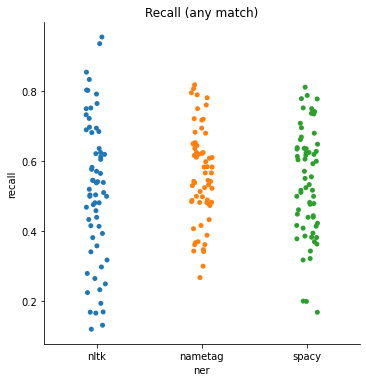

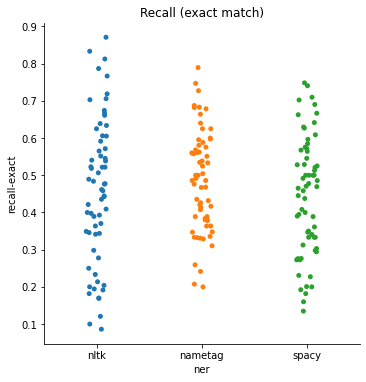

In [9]:
sns.catplot(data=df[df["features"] > min_feat], y="recall", x="ner")
plt.title('Recall (any match)')
sns.catplot(data=df[df["features"] > min_feat], y="recall-exact", x="ner")
plt.title('Recall (exact match)')

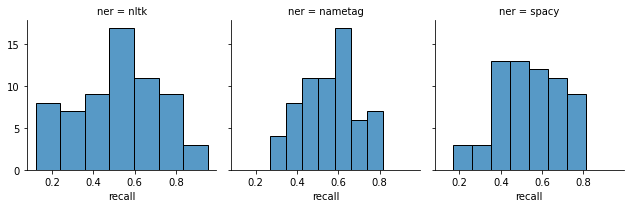

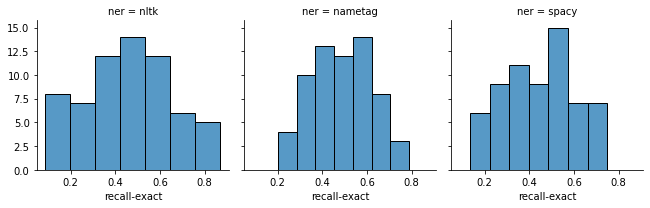

In [10]:
g = sns.FacetGrid(df[df["features"] > min_feat], col="ner")
g.map(sns.histplot, "recall")
g = sns.FacetGrid(df[df["features"] > min_feat], col="ner")
g.map(sns.histplot, "recall-exact")

<AxesSubplot:title={'center':'Recall (weighted)'}, xlabel='ner', ylabel='recall'>

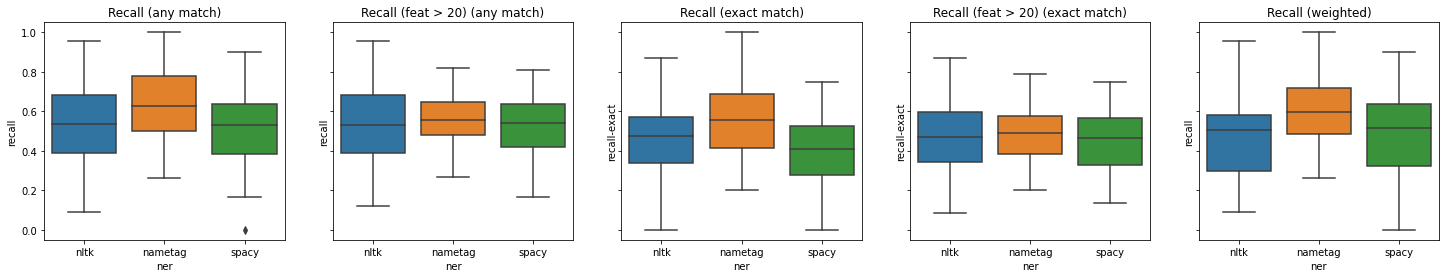

In [11]:
fig, axs = plt.subplots(ncols=5, figsize=(25,4), sharey=True)
axs[0].set_title('Recall (any match)')
sns.boxplot(data=df, x="ner", y="recall", ax=axs[0])
axs[1].set_title(f"Recall (feat > {min_feat}) (any match)")
sns.boxplot(data=df[df["features"] > min_feat], x="ner", y="recall", ax=axs[1])
axs[2].set_title('Recall (exact match)')
sns.boxplot(data=df, x="ner", y="recall-exact", ax=axs[2])
axs[3].set_title(f"Recall (feat > {min_feat}) (exact match)")
sns.boxplot(data=df[df["features"] > min_feat], x="ner", y="recall-exact", ax=axs[3])

def reindex_df(df, weights):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(weights))
    df.reset_index(drop=True, inplace=True)
    return(df)
axs[4].set_title(f"Recall (weighted)")
sns.boxplot(data=reindex_df(df, df["features"]), x="ner", y="recall", ax=axs[4])

### Full data

<AxesSubplot:xlabel='recall', ylabel='Count'>

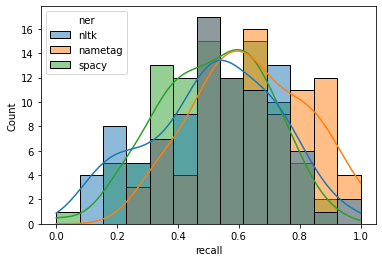

In [12]:
sns.histplot(kde=True, data=df, x="recall", hue="ner")

### Filtered data

<AxesSubplot:xlabel='recall', ylabel='Count'>

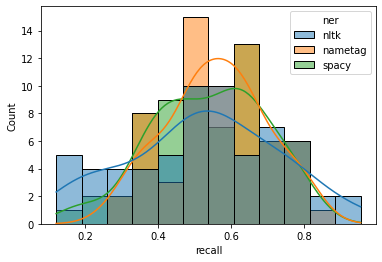

In [13]:
sns.histplot(kde=True, data=df[df["features"] > min_feat], x="recall", hue="ner")

<AxesSubplot:xlabel='recall', ylabel='Proportion'>

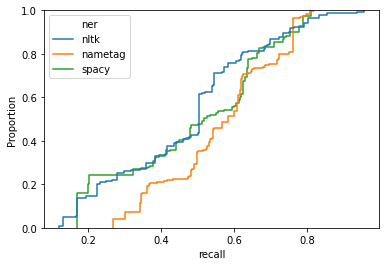

In [14]:
sns.ecdfplot(df[df["features"] > min_feat], x="recall", hue="ner", weights=df[df["features"] > min_feat]["features"])

## Precision

$$ \text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{TP}}{\text{Total predicted posititive}} $$


In [15]:
df['prec'] = (df['exact'] + df['inside'] + df['partial']) / df['lines']

In [16]:
df.describe()

,features,exact,inside,partial,lines,recall,recall-exact,prec
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,69.642105,31.175439,3.294737,1.140351,75.487719,0.558064,0.471075,0.601993
std,118.782638,54.538371,10.475532,2.042149,134.822669,0.196877,0.193025,0.246997
min,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,14.000000,7.000000,0.000000,0.000000,13.000000,0.428571,0.333333,0.407407
50%,32.000000,14.000000,1.000000,0.000000,28.000000,0.555556,0.485915,0.603604
75%,85.000000,37.000000,3.000000,1.000000,91.000000,0.694444,0.591549,0.790323
max,994.000000,592.000000,164.000000,19.000000,1576.000000,1.000000,1.000000,1.200000


<AxesSubplot:title={'center':'Precision (weighted)'}, xlabel='ner', ylabel='prec'>

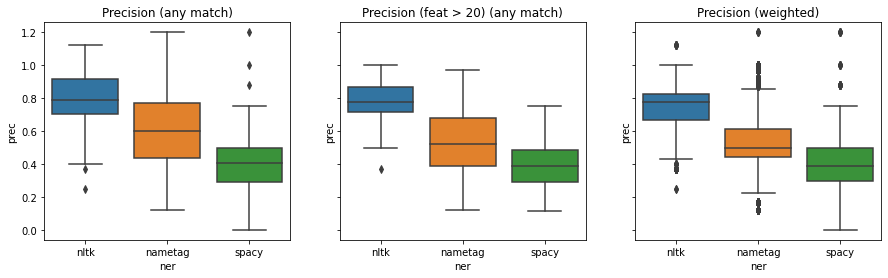

In [17]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
axs[0].set_title('Precision (any match)')
sns.boxplot(data=df, x="ner", y="prec", ax=axs[0])
axs[1].set_title(f"Precision (feat > {min_feat}) (any match)")
sns.boxplot(data=df[df["features"] > min_feat], x="ner", y="prec", ax=axs[1])

def reindex_df(df, weights):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(weights))
    df.reset_index(drop=True, inplace=True)
    return(df)
axs[2].set_title(f"Precision (weighted)")
sns.boxplot(data=reindex_df(df, df["features"]), x="ner", y="prec", ax=axs[2])

## Summary


In [18]:
summary = df.groupby("ner", as_index=False).sum()
summary["recall"] = (summary["exact"] + summary["inside"] + summary["partial"] )/ summary["features"]
summary["prec"] = (summary["exact"] + summary["inside"] + summary["partial"] )/ summary["lines"]
summary["f1"] = 2 * (summary["prec"] * summary["recall"]) / (summary["prec"] + summary["recall"])
summary

,ner,features,exact,inside,partial,lines,recall,recall-exact,prec,f1
0,nametag,6616,3272,412,109,8390,0.573307,52.669729,0.452086,0.505531
1,nltk,6616,2839,180,103,4205,0.471886,43.163744,0.742449,0.577026
2,spacy,6616,2774,347,113,8919,0.488815,38.422850,0.362597,0.416350


<AxesSubplot:title={'center':'f1'}, xlabel='ner', ylabel='f1'>

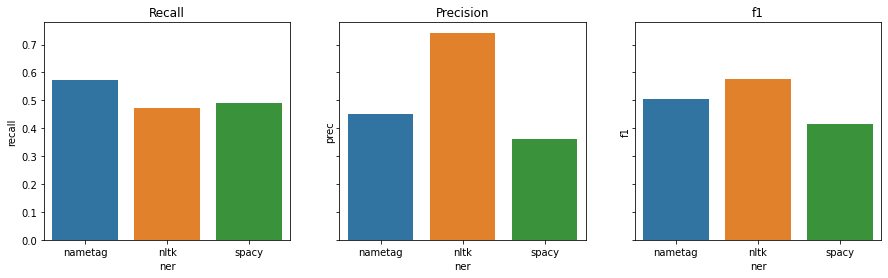

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
axs[0].set_title('Recall')
sns.barplot(data=summary, x="ner", y="recall", ax=axs[0])
axs[1].set_title(f"Precision")
sns.barplot(data=summary, x="ner", y="prec", ax=axs[1])
axs[2].set_title('f1')
sns.barplot(data=summary, x="ner", y="f1", ax=axs[2])

### Tokenization

In [20]:
summary["missing"] = summary["features"] - (summary["exact"] + summary["inside"] + summary["partial"])
summary[["ner", "exact", "inside", "partial", "missing"]]

,ner,exact,inside,partial,missing
0,nametag,3272,412,109,2823
1,nltk,2839,180,103,3494
2,spacy,2774,347,113,3382


array([<AxesSubplot:ylabel='nametag'>, <AxesSubplot:ylabel='nltk'>,
       <AxesSubplot:ylabel='spacy'>], dtype=object)

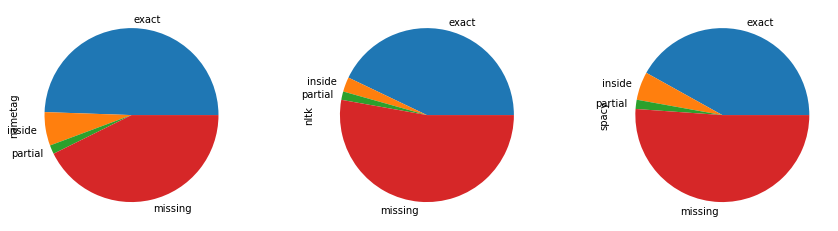

In [21]:
rows = summary.shape[0]
summary.set_index("ner")[["exact", "inside", "partial", "missing"]].T.plot.pie(subplots=True, figsize=[5*rows,4], legend=False)